# Student ID: 2487190G


# Silhouette Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn import mixture
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import itertools
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
import itertools
from scipy import linalg
%matplotlib inline
from sklearn.metrics import silhouette_samples, silhouette_score #https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [2]:
digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target
print(labels.shape)
print(digits.data.shape)
print(data.shape)
print(labels[0:20])

(1797,)
(1797, 64)
(1797, 64)
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


In [3]:
reduced_data = PCA(n_components=2).fit_transform(data)

In [4]:
reduced_data.shape

(1797, 2)

### visualizing the data:


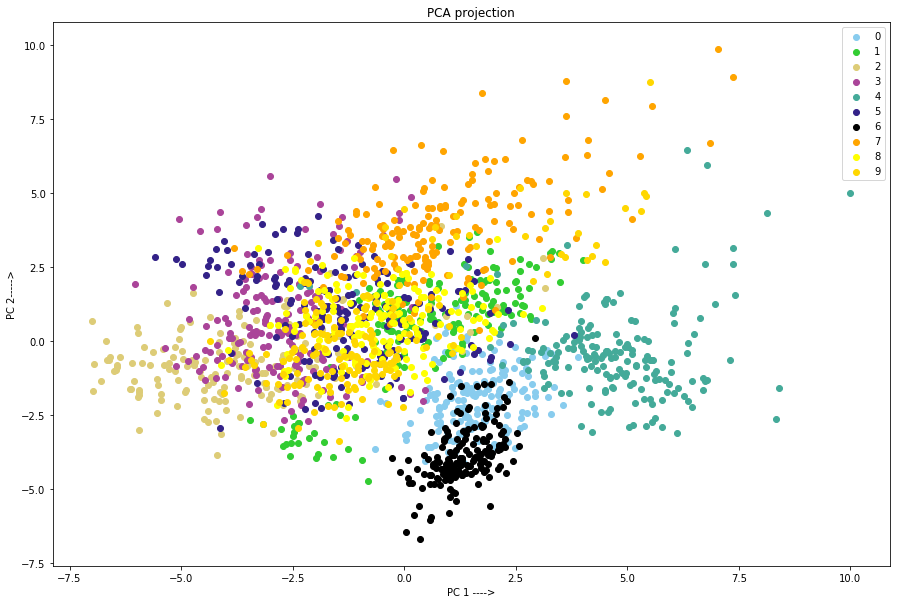

In [5]:
#https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py
cmap_10=['#88CCEE', 'limegreen', '#DDCC77','#AA4499','#44AA99','#332288','k','orange','yellow','gold']

#Y_train_labels=np.unique(labels)
def plot_real_data():    
    plt.figure(figsize=(15,10))
    for color_index, color in enumerate(cmap_10): #enumerating cmap_10 list to use the index
        data = reduced_data[labels == color_index]    #selects X_train rows where corresponding y_train is color_index
        plt.scatter(data[:, 0], data[:, 1], color=color,
                        label=color_index)

    plt.title("PCA projection")
    plt.xlabel("PC 1 ---->")
    plt.ylabel("PC 2----->")
    plt.legend(loc=0)
    
plot_real_data()

In [6]:

cov_type=['full','spherical','diag','tied']



silhouette_df=pd.DataFrame(columns=cov_type,index=[x for x in range(2,11)])


for i in range(2,11):
  
    for j in cov_type:
    
        gmm = mixture.GaussianMixture(n_components=i,
                                      covariance_type=j, random_state=123)
        
        y_predict=gmm.fit_predict(reduced_data,labels)
        
        
        
        silhouette_df.loc[i,j]=silhouette_score(reduced_data,y_predict)
        
        
        

In [7]:
silhouette_df

,full,spherical,diag,tied
2,0.383586,0.362595,0.356801,0.379704
3,0.384357,0.396016,0.394006,0.385232
4,0.370832,0.338644,0.369634,0.372149
5,0.361922,0.346861,0.357613,0.372483
6,0.37859,0.36834,0.372768,0.383928
7,0.359515,0.353531,0.350783,0.321472
8,0.352698,0.358585,0.351731,0.344746
9,0.362798,0.35518,0.360446,0.361955
10,0.354956,0.356972,0.346337,0.351435


In [8]:
max_cov=silhouette_df.max(axis=1).values.tolist() #taking max along axis=1 in silhouette_df DataFrame and converting to a list object
best_k=max_cov.index(max(max_cov))+2    #finding the index of the list which is maximum=max_cov and adding 2 because it should start with 2
print(f"The best k is : {best_k}") 




The best k is : 3


### Visualizing the silhouette_df:

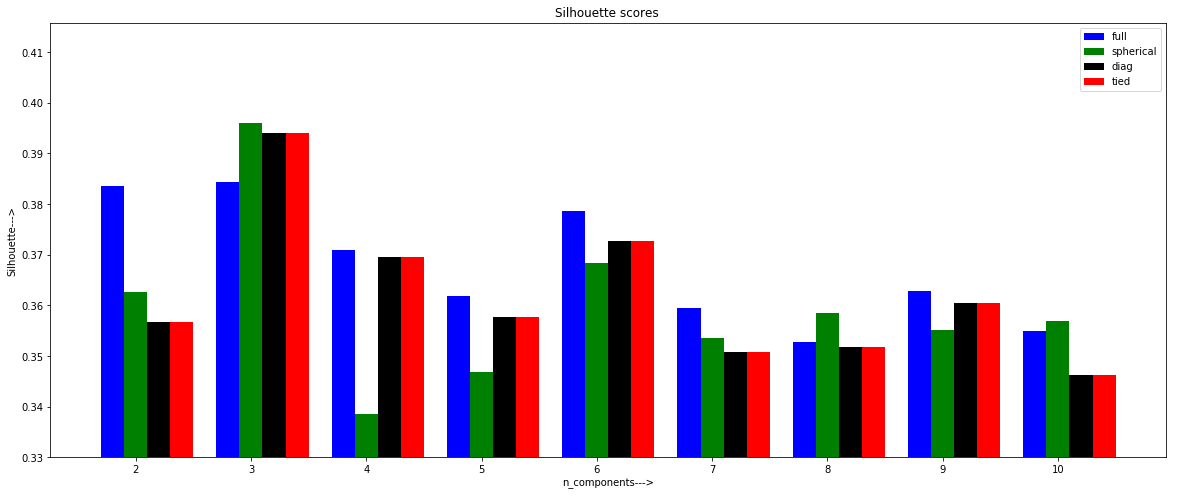

In [9]:
index=np.array([x for x in range(2,11)])
values1=[full for full in silhouette_df['full']]
values2=[spherical for spherical in silhouette_df['spherical']]
values3=[diag for diag in silhouette_df['diag']]
values4=[tied for tied in silhouette_df['tied']]

bw=0.2
plt.figure(figsize=(20,8))
plt.bar(index,values1,bw,color='b', label='full')

plt.bar(index+bw,values2,bw,color='g',label='spherical')
plt.bar(index+2*bw,values3,bw,color='k',label='diag')
plt.bar(index+3*bw,values3,bw,color='r',label='tied')
plt.xticks(index+bw,['2','3','4','5','6','7','8','9','10'])
plt.ylim(bottom=0.33)
plt.xlabel('n_components--->')
plt.ylabel('Silhouette--->')
plt.title("Silhouette scores ")
plt.legend(loc=0)

## According to Sillhouette Score, best cluster number is 3 and covariance type is Spherical

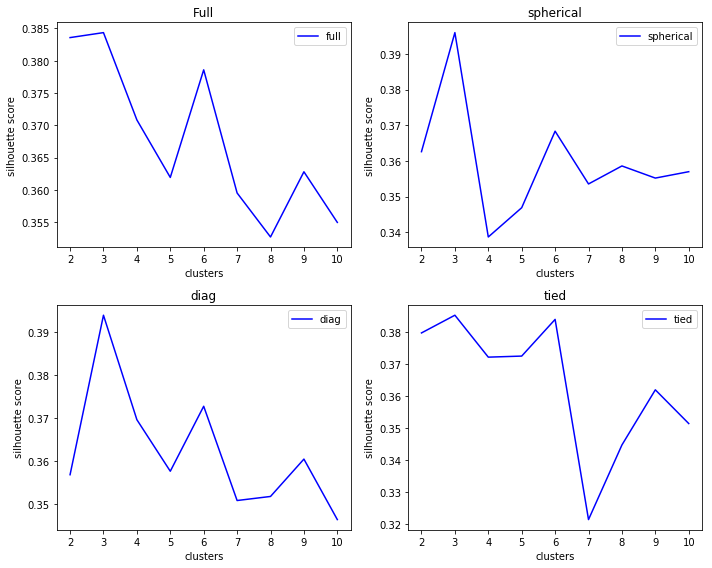

In [10]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,8))

ax[0,0].plot(silhouette_df['full'],'b')
ax[0,0].set_title('Full')
ax[0,0].set_xlabel('clusters')
ax[0,0].set_ylabel('silhouette score')
ax[0,0].legend(loc=0)


ax[0,1].plot(silhouette_df['spherical'],'b')
ax[0,1].set_title('spherical')
ax[0,1].set_xlabel('clusters')
ax[0,1].set_ylabel('silhouette score')
ax[0,1].legend(loc=0)


ax[1,0].plot(silhouette_df['diag'],'b')
ax[1,0].set_title('diag')
ax[1,0].set_xlabel('clusters')
ax[1,0].set_ylabel('silhouette score')
ax[1,0].legend(loc=0)


ax[1,1].plot(silhouette_df['tied'],'b')
ax[1,1].set_title('tied')
ax[1,1].set_xlabel('clusters')
ax[1,1].set_ylabel('silhouette score')

plt.legend(loc=0)
fig.tight_layout()

# Selecting cluster no 3 and Covariance type Spherical:

(1797, 2)


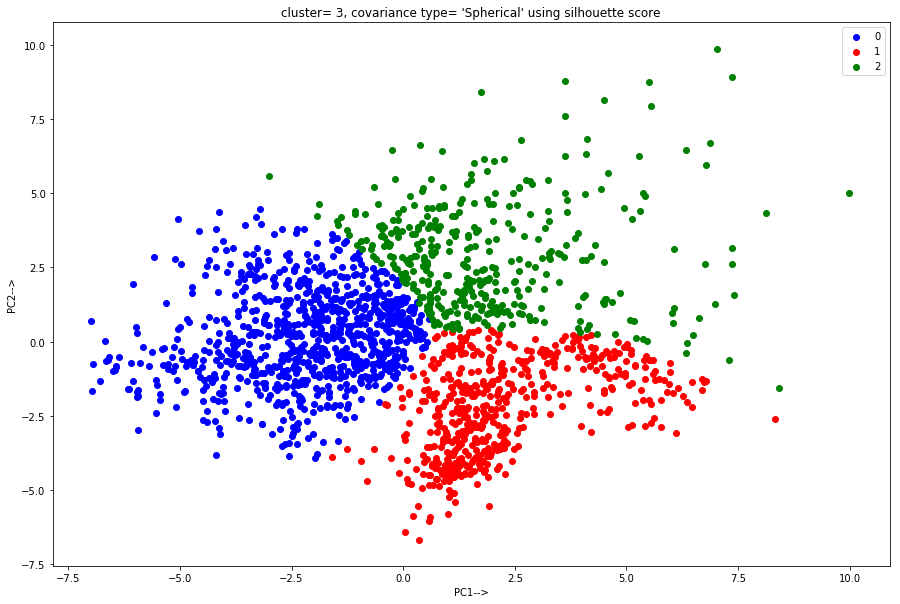

In [11]:
gmm = mixture.GaussianMixture(n_components=3,
                                      covariance_type='spherical', random_state=123)

gmm.fit(reduced_data,labels)

print(reduced_data.shape)
y_predict_silhouette=gmm.predict(reduced_data)
  

    


#cmap_4=ListedColormap(['blue','yellow','pink','green'])

cmap_3=['blue','red','green']

def plot_silhouette():
    
    plt.figure(figsize=(15,10))
    for color_index, color in enumerate(cmap_3):
        data_train = reduced_data[y_predict_silhouette == color_index] #selects X_train rows where corresponding y_predicted is color_index
        plt.scatter(data_train[:, 0], data_train[:, 1], color=color,label=color_index) #plotting the points corresponding to y_predict=colo_index




    plt.title("cluster= 3, covariance type= 'Spherical' using silhouette score")
    plt.xlabel("PC1-->")
    plt.ylabel("PC2-->")
    plt.legend(loc=0)
    
    
    


plot_silhouette()




## Since cluster is 3, finding which labels got fused together with other labels per cluster:


In [12]:
'''
1) Creating an empty dataframe cluster_df that will contain the reduced_data+labels column+y_predict_silhouette as cluster column 1797X4
2) count_of_label(label,cluster) will give count of a true label assigned to a particular cluster
3) Sort cluster_df by cluster column
4) Creating cluster_wise_df which will contain the count of true label per cluster
5) Using 2 for loops to achieve this.


'''


#y_predict_silhouette tells us which labels have been assigned which cluster:

#making DataFrame:
cluster_np=reduced_data.copy() #making a copy 

cluster_df=pd.DataFrame(cluster_np, columns=['PC1','PC2']) #creating a dataframe object
cluster_df['labels']=labels                     #adding the true labels column
cluster_df['clusters']=y_predict_silhouette           #adding the predicted clusters column





In [13]:
#this function returns the count of a true label assigned to a particular cluster: 


def count_of_label(label,cluster):
    return cluster_df[(cluster_df['labels']==label) &(cluster_df['clusters']==cluster)].count()['labels']

In [14]:
cluster_df.sort_values(by='clusters',inplace=True) #sorted the entire dataframe by clusters
#cluster_df.head(3)

cluster_wise_df=pd.DataFrame(columns=[0,1,2],index=list(range(10)))

print("The empty cluster_wise_df: \n")
print(cluster_wise_df)

for cluster in cluster_wise_df.columns:
    for label in cluster_wise_df.index:
        cluster_wise_df.iloc[label,cluster]=count_of_label(label,cluster) #filling each row,column with count of true label in that cluster
        
print("\nThe filled cluster_wise_df: \n")
print(cluster_wise_df)
print("\n Column is true label axis \n Row is cluster axis\n")

The empty cluster_wise_df: 

     0    1    2
0  NaN  NaN  NaN
1  NaN  NaN  NaN
2  NaN  NaN  NaN
3  NaN  NaN  NaN
4  NaN  NaN  NaN
5  NaN  NaN  NaN
6  NaN  NaN  NaN
7  NaN  NaN  NaN
8  NaN  NaN  NaN
9  NaN  NaN  NaN

The filled cluster_wise_df: 

     0    1    2
0    1  175    2
1   89   13   80
2  167    2    8
3  170    4    9
4    3  131   47
5  151   11   20
6    0  181    0
7   28    1  150
8  131   13   30
9  139    6   35

 Column is true label axis 
 Row is cluster axis



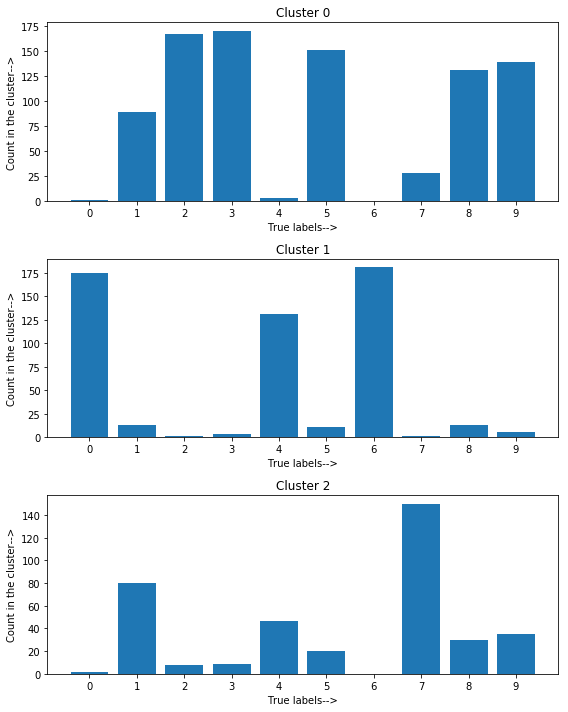

In [15]:

index=list(range(10))

fig,ax=plt.subplots(nrows=3,ncols=1, figsize=(8,10))

#bar plot to show the count of each true label in the cluster 0

ax[0].bar(index,cluster_wise_df[0])
ax[0].set_xticks(index)
ax[0].set_title('Cluster 0')
ax[0].set_ylabel('Count in the cluster-->')
ax[0].set_xlabel('True labels-->')

#bar plot to show the count of each true label in the cluster 1

ax[1].bar(index,cluster_wise_df[1])
ax[1].set_xticks(index)
ax[1].set_title('Cluster 1')
ax[1].set_ylabel('Count in the cluster-->')
ax[1].set_xlabel('True labels-->')

#bar plot to show the count of each true label in the cluster 2

ax[2].bar(index,cluster_wise_df[2])
ax[2].set_xticks(index)
ax[2].set_title('Cluster 2')
ax[2].set_ylabel('Count in the cluster-->')
ax[2].set_xlabel('True labels-->')

plt.tight_layout()


## We can see that majority of true label 0s and 6s are explained by cluster no 1

### Where is our cluster 1? 

### It is the RED coloured zone

### So this RED zone accomodates majority of 0s and 6s

### If we compare it with PCA of original data, we find that this area has 2 colours: Black and Sky Blue

### Black in PCA scatter plot is 6s and Sky blue is 0




# Visualizing the cluster 3 model per covariance matrix type

In [16]:



#Given in the case study
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')
        

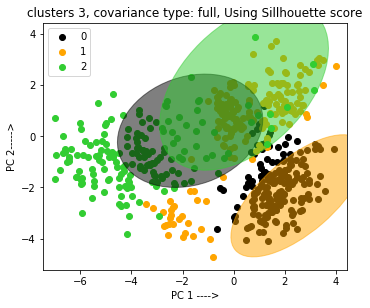

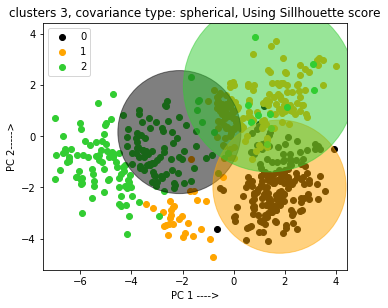

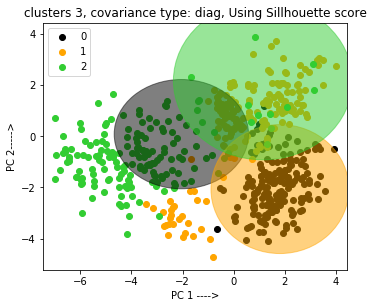

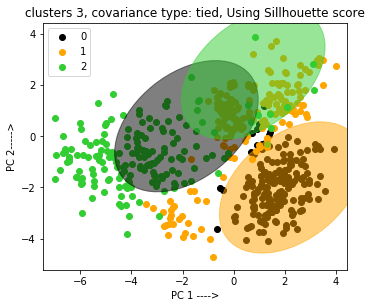

In [17]:
#colors = ['navy', 'turquoise', 'darkorange']
colors=['k','orange','limegreen']

index=1 #it controls which subplot I am working on



#for each covariance matrix, plotting the clusters:
for cov_matrix in ['full','spherical','diag','tied']:
    gmm = mixture.GaussianMixture(n_components=3,
                                      covariance_type=cov_matrix, max_iter=1000,random_state=123)

    y_predict_sillhouette=gmm.fit_predict(reduced_data,labels)
    
    fig = plt.figure(figsize=(12,10))
    #ax = f.add_subplot(121)
    h = fig.add_subplot(2, 2, index) 
    
    make_ellipses(gmm, h) #this will make the clusters appear
    index+=1   
    #https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py
    #plotting the original data
    for color_index, color in enumerate(colors): #enumerating colors list to use the index
        data = reduced_data[labels == color_index]    #selects reduced_data rows where corresponding label is color_index
        plt.scatter(data[:, 0], data[:, 1], color=color, #plotting the original data
                        label=color_index)

    plt.title(f"clusters 3, covariance type: {cov_matrix}, Using Sillhouette score")
    plt.xlabel("PC 1 ---->")
    plt.ylabel("PC 2----->")
    plt.legend(loc=0)
    
    